# Image Information

The main objectives of this module are:

* Manipulate an image with Python, scikit-image and numpy.
* Process images at the pixel level.
* Compute and understand image histograms.
* Understand lossless compression & reconstruction.
* Understand the co-occurrence matrix.
* Use different colour representations.

## 1. Read & write an image

In this exercise, we will simply open an image file, display it, and save a copy. 

**Use the [scikit-image io](https://scikit-image.org/docs/dev/api/skimage.io.html) module to open, show & save a copy of the "camera.jpg" image.**

*Note: we use the **%matplotlib inline** command to display the image in the notebook. It would not be necessary if you execute the code in the terminal or in a standard IDE like PyCharm.*

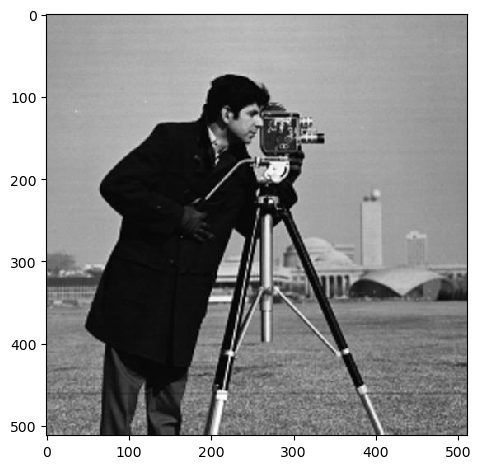

In [590]:
from skimage.io import imread,imsave,imshow
%matplotlib inline

im = imread('camera.jpg')
imshow(im)


When you open an image with scikit-image, it is stored as a Numpy [ndarray](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.html) object. Numpy arrays are objects which can be easily manipulated for numerical computations.

**Using *ndarray* methods & attributes, answer the following questions about the "camera" image:**

1. What is the shape of the image? (width & height)
1. What is the minimum pixel value? What is the maximum pixel value?
1. What is the data type for each pixel?
1. Show only a 100x100 pixels window taken at the center of the image.

(512, 512)
0 255
uint8


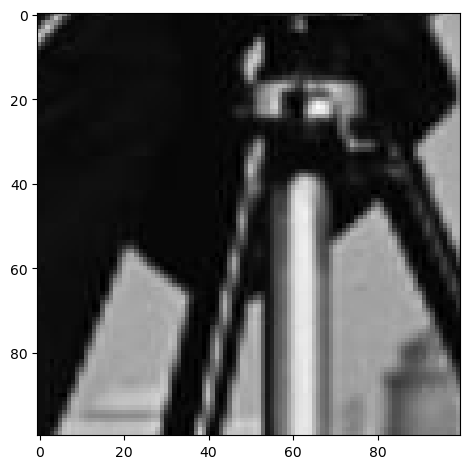

In [591]:
import numpy as np

im = imread('camera.jpg')

# Shape of the image
print(im.shape)
# Minimum and maximum values
print(np.min(im),np.max(im))
# Data type for each pixel
print(im.dtype)
# 100 * 100 square at the center of the image
xCenter = round(im.shape[0]/2)
yCenter = round(im.shape[1]/2)
subIm = im[xCenter-50:xCenter+50,yCenter-50:yCenter+50]
imshow(subIm)



**Need more help? You can check the following videos:**

* [Image I/O](https://www.youtube.com/watch?v=rgJmji4rTpw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=1)
* [Image data type & color channels](https://www.youtube.com/watch?v=rIO1EJ--yeg&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=2)

## 2. Image histograms

* Compute and plot the **histogram** and the **normalized histogram** of the example cameraman image given below.

You can use the [pyplot module](https://matplotlib.org/api/pyplot_api.html) from matplotlib to display plots & histograms.

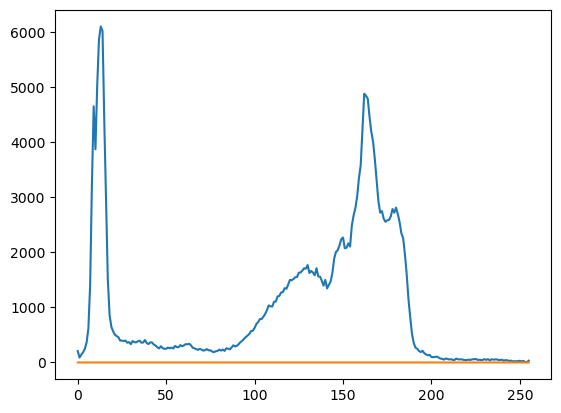

In [592]:
from matplotlib import pyplot as plt

im = imread('camera.jpg')

def hist(im):
    valueOffset = round(np.min(im))
    hist = np.zeros(round(np.max(im)) - round(np.min(im)) + 1)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            hist[round(im[i,j]) - valueOffset] += 1
    return hist

def histNormalized(im):
    valueOffset = round(np.min(im))
    hist = np.zeros(round(np.max(im)) - round(np.min(im)) + 1)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            hist[round(im[i,j]) - valueOffset] += 1
    return hist/np.sum(hist)

histo = hist(im)
histoNormalized = histNormalized(im)
# Histogram of the image
plt.plot(histo)
# Normalized histogram
plt.plot(histoNormalized)


Can you use the histogram to answer the following questions ? (you don't need to code anything here)

1. What is the average gray value of the cameraman ?
    - Yes we can calculate the average gray value of the cameraman with the histogram by multiplying each value of the histogram by its index and then dividing by the sum of the histogram 
    
1. What is the average gray value of the sky ?
    - No, we can't calculate the average gray value of the sky with the histogram since the histogram doesn't contain information about the position of the pixels in the image so we can't know precisly where the pixels of the sky are in the histogram

1. Is there more 'cameraman' pixels than 'sky' pixels ?
    - Since the cameraman is darker than the sky we could try to estimate the number of pixels of each part of the image by looking at the histogram and by integrating the histogram from 0 to a certain value for the cameraman and from certain value to 255 for the sky. But this is not a precise way to do it since the histogram doesn't contain information about the position of the pixels in the image and there are clears pixels in the grass too


Compute and plot the **cumulated histogram**.

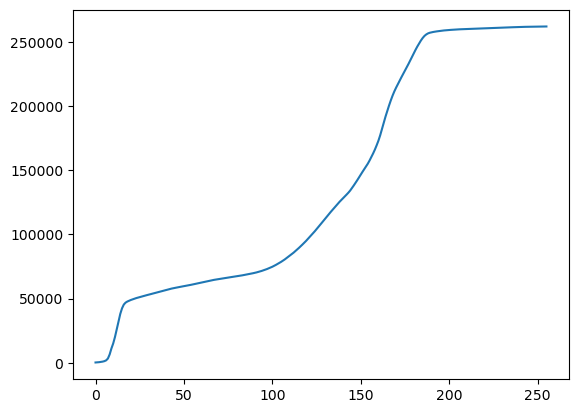

In [593]:

def cumulatedHsit(im):
    hist = np.zeros(np.max(im)-np.min(im)+1)
    for i in range(im.shape[0]):
        for j in range(im.shape[1]):
            hist[im[i,j]] += 1
    return np.cumsum(hist)

cumulatedHisto = cumulatedHsit(im)
# Cumulated histogram
plt.plot(cumulatedHisto)


**Need more help? You can check the following videos:**

* [Computing a greyscale histogram](https://www.youtube.com/watch?v=g6hkHQbwB0I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=3)
* [Numpy arrays: operations, indexing, masking](https://www.youtube.com/watch?v=rPNTkrM2dZw&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=4&t=253s)
* [Normalized and cumulative histograms](https://www.youtube.com/watch?v=uCgu0-KZt1o&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=5)

## 3. Image entropy

The "entropy" of a signal, in information theory, can generally be interpreted as the "number of bits required to encode the signal". It is a measure of the "amount of information" contained in the signal. Intuitively, a signal with a very narrow distribution (all values are close to each other) will have a very low entropy, while a signal with a wide distribution (the values are evenly distributed) will have a higher entropy.

1. Compute the image entropy of the cameraman image. The image entropy is given by $e = - \sum_{g=0}^N p(g) \log_2(p(g))$ where $p(g)$ is the probability that a pixel has the grayscale value g, and N is the number of possible grayscale values. Note that p(g) is directly given by the normalized histogram.
1. What is the entropy of a shuffled version of the cameraman ?

In [594]:

def entropy(im):
    # the normalized histogram give us the probability repartition of each intensity in the image
    histo = histNormalized(im)
    entropy = 0
    for i in range(histo.shape[0]):
        if histo[i] != 0:
            entropy += histo[i] * np.log2(histo[i])
    return -entropy

print(entropy(im))


7.065452040742872


**Need more help? You can check the following videos:**

* [Computing the image entropy](https://www.youtube.com/watch?v=L2VtGt2FsRQ&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=6)

## 4. Image compression

Using the code below as a starting point:

* **Decompose an image** by recursively subsampling its dimensions and computing the remainders, such that each level of recursion performs the following operation:

<img src='PyramidCompression.png' width='75%'/>

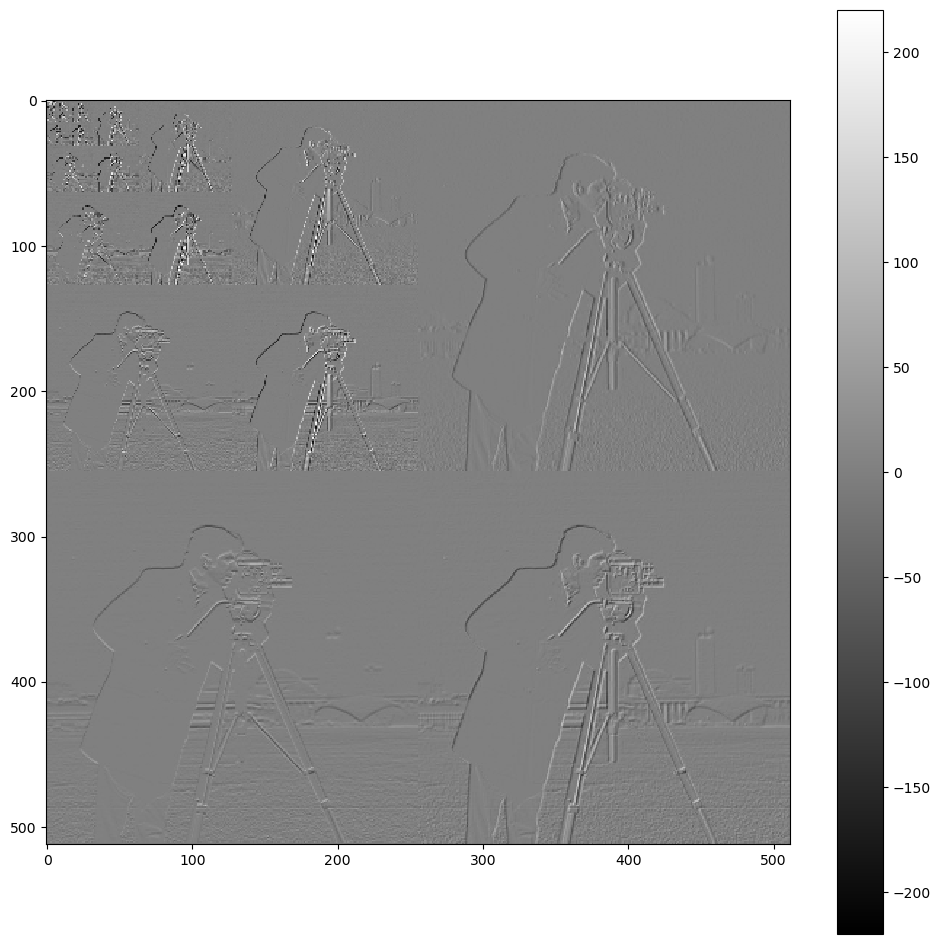

In [595]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from skimage.io import imread

# Modify this method:
def split(im,levelOfRecursion=100):
    #Yellow matrix
    a = im[0:-1:2 ,0:-1:2]
    #Green matrix
    b = im[0:-1:2 ,1::2]
    #Blue matrix
    c = im[1::2 ,0:-1:2]
    #Black matrix
    d = im[1::2 ,1::2]

    b = b - a
    c = c - a
    d = d - a

    levelOfRecursion -= 1

    if a.shape[0] > 4 and a.shape[1] > 4 and levelOfRecursion > 0:
        a = split(a,levelOfRecursion)

    R = np.vstack((np.hstack((a,b)),np.hstack((c,d))))
    return R

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
s = split(im,30)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255S
# vmax=255 -> set "white" as 255
plt.imshow(s,interpolation='nearest',cmap=cm.gray,vmin=np.min(s), vmax=np.max(s))
plt.colorbar()

plt.show()

**Compute how the image entropy evolves** with regards to the level of decomposition

In [596]:
print("After compression, the entropy of the image is : " + str(entropy(s)))

After compression, the entropy of the image is : 4.524558709167687


**Rebuild the original image** from the pyramid (allowing the selection the level of recursion)

In [597]:
'''
def unsplit(im,levelOfRecursion=100):
    referenceMatrixSize = round(im.shape[0] / 2** (levelOfRecursion))

    # If the level of recursion is higher than the maximum possible, we set it to the maximum
    if referenceMatrixSize > 4:
        referenceMatrixSize = 4
        levelOfRecursion = round(np.log2(im.shape[0]/4))
    
    referenceMatrix = im[0:referenceMatrixSize ,0:referenceMatrixSize]

    a = im[0:-1:2 ,0:-1:2]
    b = im[0:-1:2 ,1::2]
    c = im[1::2 ,0:-1:2]
    d = im[1::2 ,1::2]

    xCenter = round(a.shape[0]/2)
    yCenter = round(a.shape[1]/2)
    xMax = round(a.shape[0])
    yMax = round(a.shape[1])

    a = im[0:xCenter ,0:yCenter] + referenceMatrix
    b = im[0:xCenter,yCenter:yMax] + referenceMatrix
    c = im[xCenter:xMax,0:yCenter] + referenceMatrix
    d = im[xCenter:xMax,yCenter:yMax] + referenceMatrix

    im[0:-1:2 ,0:-1:2] = a
    im[0:-1:2 ,1::2] = b
    im[1::2 ,0:-1:2] = c
    im[1::2 ,1::2] = d



    levelOfRecursion -= 1
    if levelOfRecursion > 0:
        im = unsplit(im,levelOfRecursion)
    
    return im

im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
s = split(im,30)
#u = unsplit(s,30)

plt.figure(figsize=(12,12))
# interpolation='nearest' -> don't try to interpolate values between pixels if the size of the display is different from the size of the image
# cmap=cm.gray -> display in grayscale
# vmin=-255 -> set "black" as -255
# vmax=255 -> set "white" as 255
#plt.imshow(u,interpolation='nearest',cmap=cm.gray,vmin=np.min(u), vmax=np.max(u))
plt.colorbar()

plt.show()
'''

'\ndef unsplit(im,levelOfRecursion=100):\n    referenceMatrixSize = round(im.shape[0] / 2** (levelOfRecursion))\n\n    # If the level of recursion is higher than the maximum possible, we set it to the maximum\n    if referenceMatrixSize > 4:\n        referenceMatrixSize = 4\n        levelOfRecursion = round(np.log2(im.shape[0]/4))\n    \n    referenceMatrix = im[0:referenceMatrixSize ,0:referenceMatrixSize]\n\n    a = im[0:-1:2 ,0:-1:2]\n    b = im[0:-1:2 ,1::2]\n    c = im[1::2 ,0:-1:2]\n    d = im[1::2 ,1::2]\n\n    xCenter = round(a.shape[0]/2)\n    yCenter = round(a.shape[1]/2)\n    xMax = round(a.shape[0])\n    yMax = round(a.shape[1])\n\n    a = im[0:xCenter ,0:yCenter] + referenceMatrix\n    b = im[0:xCenter,yCenter:yMax] + referenceMatrix\n    c = im[xCenter:xMax,0:yCenter] + referenceMatrix\n    d = im[xCenter:xMax,yCenter:yMax] + referenceMatrix\n\n    im[0:-1:2 ,0:-1:2] = a\n    im[0:-1:2 ,1::2] = b\n    im[1::2 ,0:-1:2] = c\n    im[1::2 ,1::2] = d\n\n\n\n    levelOfRecursio

**Need more help? You can check the following videos:**

* [Subsampling and rescaling](https://www.youtube.com/watch?v=rYNUby5bIlA&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=7)
* [Pyramid compression](https://www.youtube.com/watch?v=yrsyF8T5OAU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=8)

## 5. Co-occurrence matrix

While the histogram of an image is independent of the position of the pixels, the co-occurrence matrix gives us information about their spatial distribution.

A co-occurrence matrix is computed for a given displacement, looking at the pair of values spatially separated by that displacement. The co-occurrence matrix is a square matrix, its size given by the number of possible values that a pixels can take in the image.

1. Compute de [cooccurrence matrix](https://en.wikipedia.org/wiki/Co-occurrence_matrix) for a chosen displacement $(\Delta x,\Delta y)$ (see [greycomatrix](http://scikit-image.org/docs/dev/api/skimage.feature.html#skimage.feature.greycomatrix) in scikit-image)
1. What is the entropy of the cooccurrence matrix ?
1. How does this entropy evolve if we increase the displacement ?

The entropy of the GLCM matrix is : 2.360436710151059


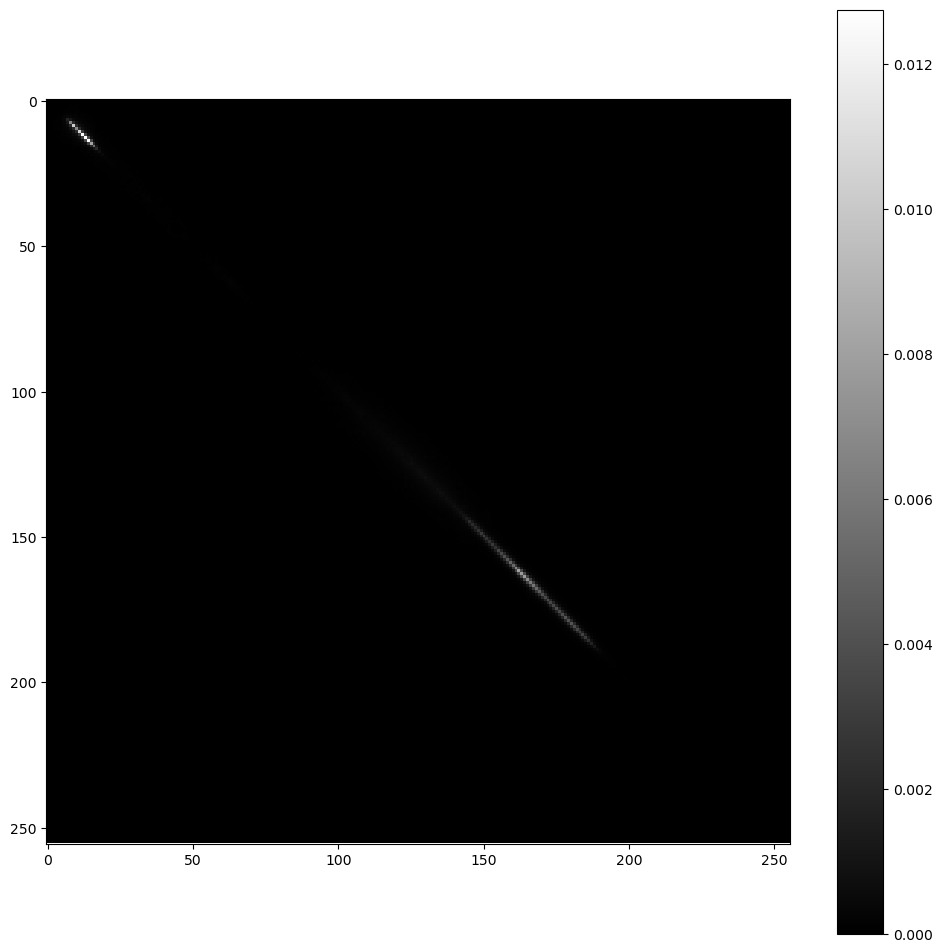

In [598]:
from skimage.feature import graycomatrix
from skimage.measure.entropy import shannon_entropy as ent

# -- Your code here -- #
im = imread('camera.jpg').astype(np.int16) # cast the camera image as a signed integer to avoid overflow
# Compute the GLCM matrix
glcm = graycomatrix(im, [1], [0], 256, symmetric=True, normed=True)

# Compute the GLCM entropy
entropy = ent(glcm[:,:,0])
print("The entropy of the GLCM matrix is : " + str(entropy))

# Plot the GLCM matrix
plt.figure(figsize=(12,12))
plt.imshow(glcm[:,:,0],interpolation='nearest',cmap=cm.gray,vmin=np.min(glcm), vmax=np.max(glcm))
plt.colorbar()
plt.show()

**Need more help? You can check the following videos:**

* [Grayscale co-occurence matrix](https://www.youtube.com/watch?v=cq0Br3zB2AU&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=9)

## 6. Colour representations

A colour image is typically encoded with three channels: Red, Green and Blue. In the example below, we open the *immunohistochemistry()* example image and split it into the three channels, which we display: 

(512, 512, 3) uint8


<Figure size 640x480 with 0 Axes>

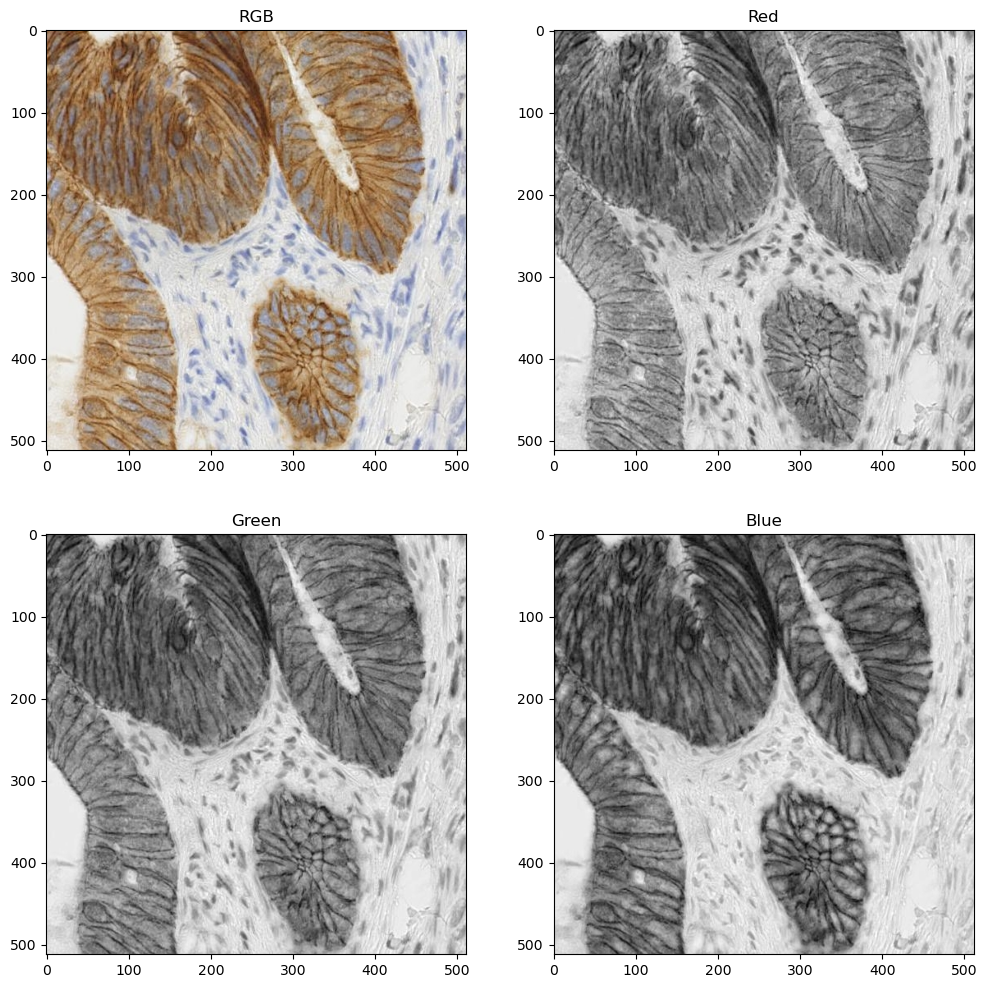

In [599]:
from skimage.data import immunohistochemistry

im = immunohistochemistry() # scikit-image method to load the example image
print(im.shape,im.dtype)
r = im[:,:,0]
g = im[:,:,1]
b = im[:,:,2]

plt.gray() # Use grayscale by default on 1-channel images, so you don't have to add cmap=plt.cm.gray everytime

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(im)
plt.title('RGB')
plt.subplot(2,2,2)
plt.imshow(r)
plt.title('Red')
plt.subplot(2,2,3)
plt.imshow(g)
plt.title('Green')
plt.subplot(2,2,4)
plt.imshow(b)
plt.title('Blue')
plt.show()

1. Compute & show the color histograms
1. Convert the image to the HSV color space & compute the HSV histograms. [See the skimage documentation for reference on color transformation](http://scikit-image.org/docs/dev/api/skimage.color.html#rgb2hsv)
1. Find a method to isolate the brown cells in the immunohistochemistry image
    1. In the RGB space
    1. In the HSV space

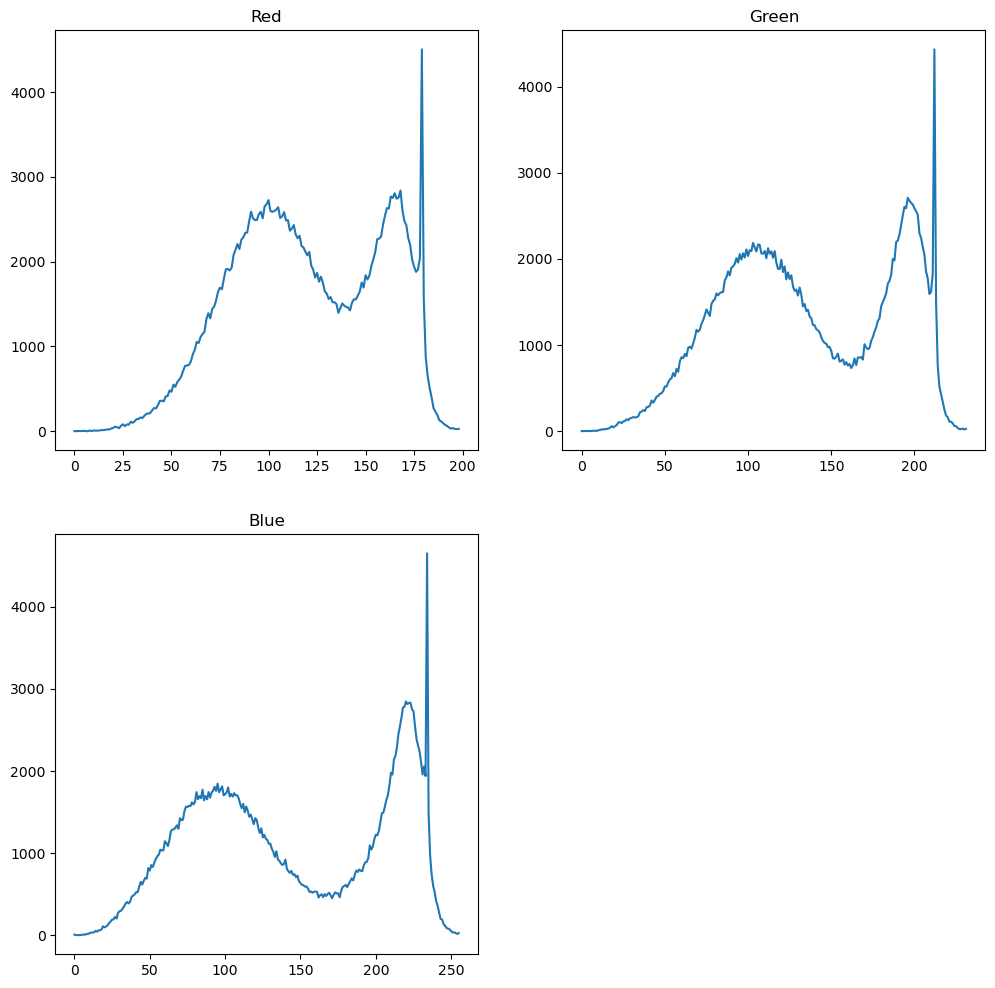

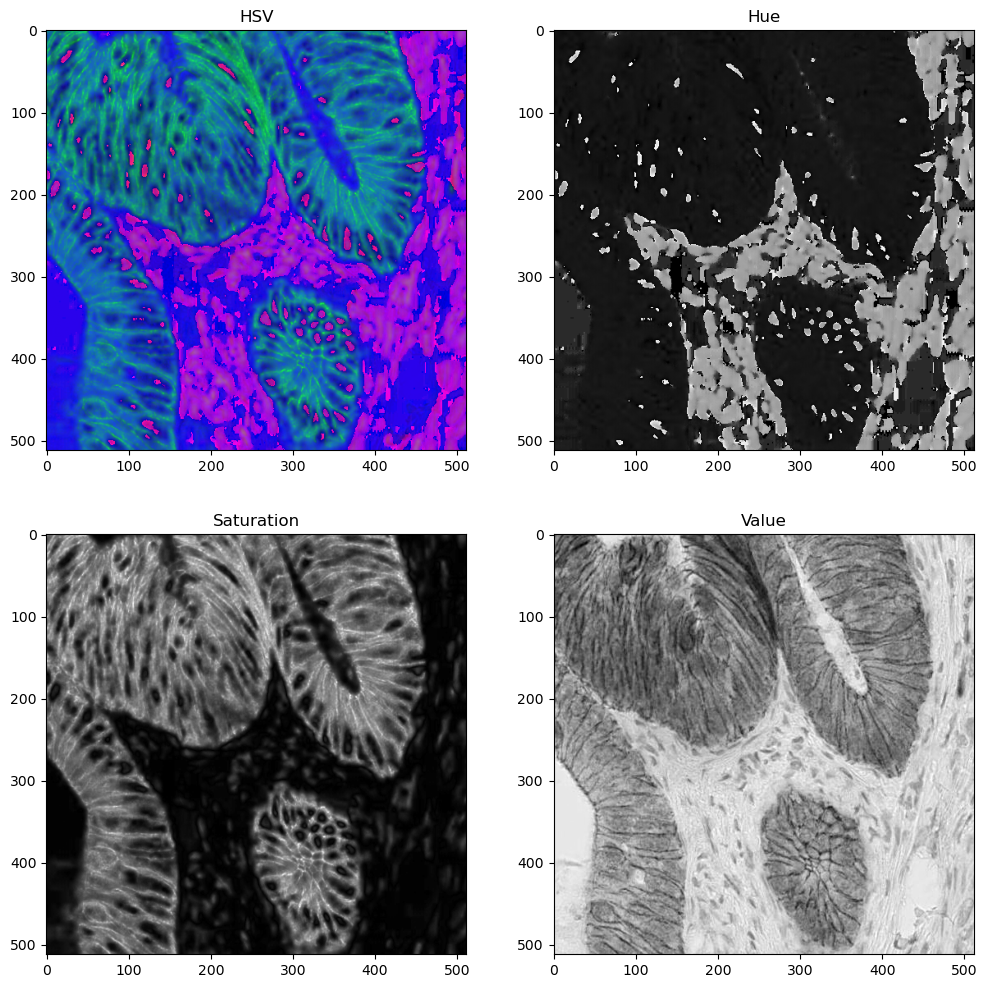

In [600]:
from skimage.color import rgb2hsv
# -- Your code here -- #
# Color histogram

rHist = hist(r)
gHist = hist(g)
bHist = hist(b)


plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.plot(rHist)
plt.title('Red')
plt.subplot(2,2,2)
plt.plot(gHist)
plt.title('Green')
plt.subplot(2,2,3)
plt.plot(bHist)
plt.title('Blue')
plt.show()

imHsv = rgb2hsv(im)

h = imHsv[:,:,0]
s = imHsv[:,:,1]
v = imHsv[:,:,2]

plt.figure(figsize=(12,12))
plt.subplot(2,2,1)
plt.imshow(imHsv,cmap='hsv')
plt.title('HSV')
plt.subplot(2,2,2)
plt.imshow(h)
plt.title('Hue')
plt.subplot(2,2,3)
plt.imshow(s)
plt.title('Saturation')
plt.subplot(2,2,4)
plt.imshow(v)
plt.title('Value')
plt.show()





**Need more help? You can check the following videos:**

* [RGB vs HSV](https://www.youtube.com/watch?v=oVpSTZtZQNM&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=10)
* [Distances: image space and colour space](https://www.youtube.com/watch?v=f6aJJldc38E&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=11)
* [Creating a Magic Wand](https://www.youtube.com/watch?v=Aw--_cJ7o5I&list=PLI3XOM9BWLSW6vTPxc9ZfSABS31o7HMub&index=12)

# Coding Project - Watermark

Write code to automatically add a watermark to a photograph.

<img src='ex_wm.jpg' width="500px" />

## Main requirements

The minimum requirements are to:
* Add the white pixels from the watermark somewhere in the photograph.
* Save the resulting image as an image file & display it in the notebook

You may use the *watermark.png* file available in the GitHub repository, or choose/create your own.

## Additional requirements

(note: this is not an exhaustive list, use your imagination!)

* Add an option to choose the watermark location
* Add transparency effect to the watermark
* Determine if the watermark should be dark or light based on the luminosity of the image
* ...


In [601]:
im = imread('etretat.jpg').astype(np.int16) # cast the image as a signed integer to avoid overflow
wm = imread('watermark.png').astype(np.int16)

def addWatermark(im,wm,alpha,offset):
    xOffset = offset[0]
    yOffset = offset[1]
    # Prevent the watermark from being placed outside the image
    if offset[0] > im.shape[0] - wm.shape[0]:
        xOffset = im.shape[0] - wm.shape[0]
    if offset[1] > im.shape[1] - wm.shape[1]:
        yOffset = im.shape[1] - wm.shape[1]
    if xOffset < 0:
        xOffset = 0
    if yOffset < 0:
        yOffset = 0

    for i in range(wm.shape[0]):
        for j in range(wm.shape[1]):
           if wm [i,j] > 0:
                im[i+xOffset,j+yOffset] = min((wm[i,j] * alpha + im[i+xOffset,j+yOffset]),255)

addWatermark(im,wm,0.5,(0,0))

plt.figure(figsize=(12,12))
plt.imshow(im)
plt.show()




ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()